In [1]:
# Installing pycaret
!pip install pycaret

In [2]:
# Getting the Data
from pycaret.datasets import get_data
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [3]:
#check the shape of data
dataset.shape

(24000, 24)

In [5]:
#a sample of 1200 records has been withheld from the original dataset to be used for predictions
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


# Setting up Environment in PyCaret

In [6]:
from pycaret.classification import *

In [7]:
exp_clf101 = setup(data = data, target = 'default', session_id=123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(22800, 24)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# Comparing All Models

In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ridge Classifier,0.8236,0.0000,0.3646,0.6932,0.4776,0.3836,0.4124,0.0368
1,Linear Discriminant Analysis,0.8236,0.7703,0.3813,0.6818,0.4888,0.3923,0.4167,0.3270
2,Gradient Boosting Classifier,0.8226,0.7888,0.3654,0.6870,0.4768,0.3818,0.4095,6.8713
3,Extreme Gradient Boosting,0.8218,0.7894,0.3595,0.6862,0.4715,0.3767,0.4054,2.8238
4,Light Gradient Boosting Machine,0.8214,0.7859,0.3878,0.6663,0.4900,0.3908,0.4120,0.5432
5,CatBoost Classifier,0.8204,0.7888,0.3839,0.6629,0.4860,0.3864,0.4077,15.2999
6,Ada Boost Classifier,0.8185,0.7783,0.3507,0.6729,0.4607,0.3644,0.3926,1.8039
7,Random Forest Classifier,0.8093,0.7401,0.3363,0.6295,0.4382,0.3359,0.3600,0.3157
8,Extra Trees Classifier,0.8091,0.7501,0.3841,0.6083,0.4707,0.3615,0.3758,1.9649
9,Quadratic Discriminant Analysis,0.7892,0.7390,0.1731,0.6275,0.2376,0.1696,0.2313,0.1759


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)

# Create a Model

### 1. Decision Tree Classifier

In [9]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7224,0.6109,0.4108,0.3816,0.3956,0.2158,0.2160
1,0.7199,0.6225,0.4448,0.3848,0.4126,0.2300,0.2310
2,0.7400,0.6310,0.4363,0.4162,0.4260,0.2580,0.2582
3,0.7262,0.6094,0.3966,0.3846,0.3905,0.2140,0.2140
4,0.7306,0.6090,0.3909,0.3909,0.3909,0.2180,0.2180
5,0.7331,0.6381,0.4646,0.4090,0.4350,0.2612,0.2621
6,0.7155,0.6137,0.4306,0.3753,0.4011,0.2157,0.2166
7,0.7462,0.6363,0.4391,0.4282,0.4336,0.2701,0.2701
8,0.7318,0.6209,0.4221,0.3995,0.4105,0.2371,0.2372
9,0.7354,0.6194,0.4079,0.4034,0.4056,0.2355,0.2355


In [10]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


### 2. K Neighbors Classifier

In [11]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7412,0.5881,0.1671,0.3315,0.2222,0.0868,0.0941
1,0.7350,0.5787,0.1473,0.2989,0.1973,0.0601,0.0655
2,0.7632,0.6641,0.2096,0.4277,0.2814,0.1590,0.1735
3,0.7462,0.5982,0.1530,0.3375,0.2105,0.0842,0.0936
4,0.7550,0.6096,0.2040,0.3956,0.2692,0.1397,0.1508
5,0.7607,0.6200,0.1841,0.4088,0.2539,0.1351,0.1504
6,0.7406,0.5884,0.1700,0.3315,0.2247,0.0880,0.0951
7,0.7600,0.6139,0.1898,0.4085,0.2592,0.1383,0.1528
8,0.7487,0.6106,0.1898,0.3681,0.2505,0.1177,0.1270
9,0.7542,0.6254,0.1870,0.3860,0.2519,0.1256,0.1374


### 3. Random Forest Classifier

In [12]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.7531,0.3428,0.6269,0.4432,0.3400,0.3626
1,0.8127,0.7451,0.3399,0.6452,0.4453,0.3453,0.3710
2,0.8076,0.7714,0.3258,0.6250,0.4283,0.3262,0.3512
3,0.7989,0.7185,0.3144,0.5842,0.4088,0.3006,0.3215
4,0.8051,0.7249,0.3229,0.6129,0.4230,0.3191,0.3428
5,0.8152,0.7324,0.3569,0.6495,0.4607,0.3603,0.3839
6,0.8039,0.7244,0.3371,0.6010,0.4319,0.3246,0.3444
7,0.8158,0.7711,0.3399,0.6630,0.4494,0.3523,0.3807
8,0.8139,0.7183,0.3258,0.6609,0.4364,0.3400,0.3706
9,0.8107,0.7419,0.3569,0.6269,0.4549,0.3506,0.3710


### 4.Ridge Classifier

In [13]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8239,0.0000,0.3711,0.6895,0.4825,0.3877,0.4148
1,0.8214,0.0000,0.3428,0.6954,0.4592,0.3667,0.3997
2,0.8246,0.0000,0.3853,0.6834,0.4928,0.3965,0.4203
3,0.8183,0.0000,0.3569,0.6667,0.4649,0.3674,0.3934
4,0.8271,0.0000,0.3569,0.7200,0.4773,0.3875,0.4218
5,0.8233,0.0000,0.3626,0.6919,0.4758,0.3818,0.4107
6,0.8208,0.0000,0.3569,0.6811,0.4684,0.3730,0.4012
7,0.8327,0.0000,0.3739,0.7416,0.4972,0.4096,0.4442
8,0.8264,0.0000,0.3654,0.7088,0.4822,0.3905,0.4215
9,0.8176,0.0000,0.3739,0.6535,0.4757,0.3750,0.3964


# Tune a Model

### 1. Decision Tree Classifier

In [14]:
tuned_dt = tune_model(dt) # pycaret version 2 code, for version 1 ('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8271,0.7213,0.3258,0.7516,0.4545,0.3703,0.4162
1,0.8208,0.7211,0.3031,0.7279,0.4280,0.3425,0.3889
2,0.8120,0.7155,0.3484,0.6373,0.4505,0.3487,0.3719
3,0.8114,0.7089,0.2691,0.6884,0.3870,0.2999,0.3463
4,0.8195,0.6942,0.2975,0.7241,0.4217,0.3362,0.3831
5,0.8239,0.7059,0.3031,0.7535,0.4323,0.3498,0.4008
6,0.8095,0.7130,0.2663,0.6763,0.3821,0.2939,0.3387
7,0.8271,0.7433,0.2918,0.7984,0.4274,0.3505,0.4124
8,0.8164,0.7094,0.2720,0.7273,0.3959,0.3132,0.3661
9,0.8150,0.6921,0.3626,0.6465,0.4646,0.3633,0.3856


In [15]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=76, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


### 2. K Neighbors Classifier

In [16]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7751,0.6495,0.0708,0.4464,0.1222,0.0657,0.1035
1,0.7769,0.6661,0.0652,0.4694,0.1144,0.0640,0.1064
2,0.7832,0.7060,0.1133,0.5479,0.1878,0.1212,0.1724
3,0.7769,0.6409,0.0623,0.4681,0.1100,0.0612,0.1036
4,0.7769,0.6503,0.0708,0.4717,0.1232,0.0694,0.1119
5,0.7788,0.6848,0.0878,0.5000,0.1494,0.0892,0.1351
6,0.7813,0.6518,0.0765,0.5400,0.1340,0.0837,0.1381
7,0.7845,0.6588,0.0935,0.5789,0.1610,0.1060,0.1659
8,0.7769,0.6564,0.0652,0.4694,0.1144,0.0640,0.1064
9,0.7812,0.6802,0.0935,0.5323,0.1590,0.0995,0.1506


### 3. Random Forest Classifier

In [17]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8258,0.7863,0.3654,0.7049,0.4813,0.3891,0.4194
1,0.8227,0.7977,0.3541,0.6944,0.4690,0.3758,0.4066
2,0.8233,0.8225,0.3853,0.6766,0.4910,0.3937,0.4165
3,0.8177,0.7713,0.3598,0.6615,0.4661,0.3675,0.3923
4,0.8227,0.7805,0.3513,0.6966,0.4670,0.3743,0.4059
5,0.8227,0.7955,0.3683,0.6842,0.4788,0.3834,0.4101
6,0.8158,0.7568,0.3371,0.6648,0.4474,0.3507,0.3799
7,0.8377,0.7941,0.3768,0.7733,0.5067,0.4231,0.4623
8,0.8227,0.7671,0.3569,0.6923,0.4710,0.3773,0.4073
9,0.8138,0.7833,0.3654,0.6386,0.4649,0.3621,0.3828


### 4. Ridge Classifier

In [18]:
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8239,0.0000,0.3711,0.6895,0.4825,0.3877,0.4148
1,0.8214,0.0000,0.3428,0.6954,0.4592,0.3667,0.3997
2,0.8246,0.0000,0.3853,0.6834,0.4928,0.3965,0.4203
3,0.8183,0.0000,0.3569,0.6667,0.4649,0.3674,0.3934
4,0.8271,0.0000,0.3569,0.7200,0.4773,0.3875,0.4218
5,0.8233,0.0000,0.3626,0.6919,0.4758,0.3818,0.4107
6,0.8208,0.0000,0.3569,0.6811,0.4684,0.3730,0.4012
7,0.8327,0.0000,0.3739,0.7416,0.4972,0.4096,0.4442
8,0.8264,0.0000,0.3654,0.7088,0.4822,0.3905,0.4215
9,0.8176,0.0000,0.3739,0.6535,0.4757,0.3750,0.3964


***  Notice how the results after tuning have been improved:

     Decision Tree Classifier (Before: 0.7301 , After: 0.8183)
     K Neighbors Classifier (Before: 0.7505 , After: 0.7792)
     Random Forest Classifier (Before: 0.8093 , After: 0.8225)

# Plot a Model

### 1. AUC Plot

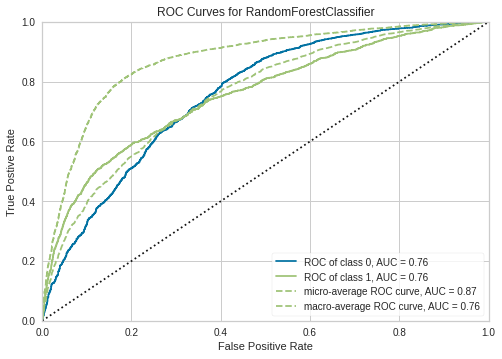

In [19]:
plot_model(tuned_rf, plot = 'auc')

### 2. Precision-Recall Curve

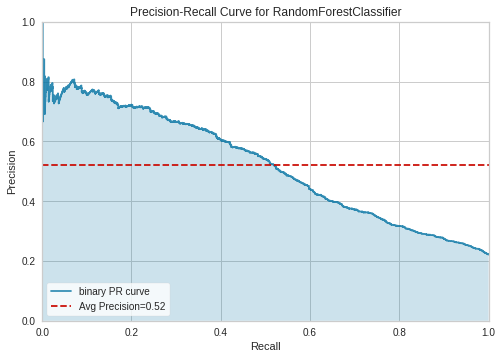

In [20]:
plot_model(tuned_rf, plot = 'pr')

### 3. Feature Importance Plot

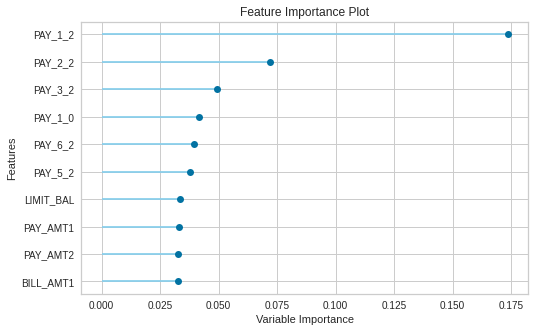

In [21]:
plot_model(tuned_rf, plot='feature')

### 4. Confusion Matrix

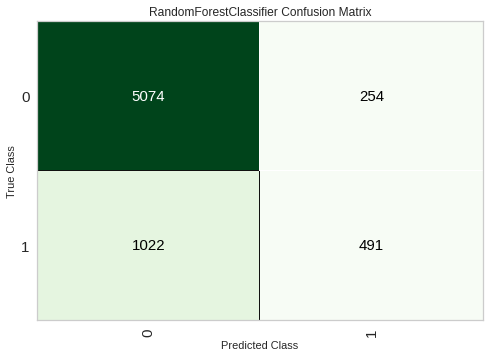

In [22]:
plot_model(tuned_rf, plot = 'confusion_matrix')

** Another way to analyze the performance of models is to use the   **evaluate_model**() function which displays a user interface for all of the **available** plots for a given model. It internally uses the plot_model() **function**.

In [ ]:
evaluate_model(tuned_rf)

# Predict on test / hold-out Sample

In [24]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8135,0.7563,0.3245,0.6591,0.4349,0.3383,0.3688


# Finalize Model for Deployment

In [25]:
final_rf = finalize_model(tuned_rf)

In [26]:
#Final Random Forest model parameters for deployment
print(final_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [27]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8345,0.8222,0.3629,0.7657,0.4924,0.4082,0.4489


In [28]:
### Notice how the AUC in final_rf has increased to 0.8189 from 0.7538, even though the model is the same. This is because the final_rf variable has been trained on the complete dataset including the test/hold-out set.

Predict on unseen data

In [29]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()
# The Label and Score columns will be added onto the data_unseen set

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,50000,2,2,1,48,0,0,0,0,0,0,48572.0,45067.0,46492.0,47368.0,7988.0,8011.0,2028.0,2453.0,2329.0,431.0,300.0,500.0,0,0,0.1591
1,200000,2,1,1,40,2,2,2,2,2,2,80468.0,82874.0,84900.0,85758.0,87003.0,89112.0,4200.0,4100.0,3000.0,3400.0,3500.0,0.0,1,1,0.7779
2,50000,2,3,1,44,1,2,3,2,4,3,13112.0,14679.0,15143.0,16892.0,16341.0,15798.0,2100.0,1000.0,2300.0,0.0,0.0,0.0,1,1,0.6478
3,60000,2,2,1,31,2,2,-1,0,0,0,63201.0,56600.0,54952.0,32094.0,31232.0,30384.0,1132.0,60994.0,1436.0,1047.0,1056.0,1053.0,1,1,0.5038
4,120000,2,3,2,32,-1,0,0,0,0,0,66551.0,67876.0,69903.0,71446.0,79589.0,81354.0,2429.0,3120.0,3300.0,10000.0,3200.0,3200.0,0,0,0.1394


# Saving the model

In [30]:
save_model(final_rf,'Final RF Model 08Feb2020')

Transformation Pipeline and Model Succesfully Saved


# Loading the saved model

In [31]:
saved_final_rf = load_model('Final RF Model 08Feb2020')

Transformation Pipeline and Model Sucessfully Loaded


Once the model is loaded in the environment, you can simply use it to predict on any new data using the same predict_model() function. Below we have applied the loaded model to predict the same data_unseen

In [32]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

In [33]:
new_prediction.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,50000,2,2,1,48,0,0,0,0,0,0,48572.0,45067.0,46492.0,47368.0,7988.0,8011.0,2028.0,2453.0,2329.0,431.0,300.0,500.0,0,0,0.1591
1,200000,2,1,1,40,2,2,2,2,2,2,80468.0,82874.0,84900.0,85758.0,87003.0,89112.0,4200.0,4100.0,3000.0,3400.0,3500.0,0.0,1,1,0.7779
2,50000,2,3,1,44,1,2,3,2,4,3,13112.0,14679.0,15143.0,16892.0,16341.0,15798.0,2100.0,1000.0,2300.0,0.0,0.0,0.0,1,1,0.6478
3,60000,2,2,1,31,2,2,-1,0,0,0,63201.0,56600.0,54952.0,32094.0,31232.0,30384.0,1132.0,60994.0,1436.0,1047.0,1056.0,1053.0,1,1,0.5038
4,120000,2,3,2,32,-1,0,0,0,0,0,66551.0,67876.0,69903.0,71446.0,79589.0,81354.0,2429.0,3120.0,3300.0,10000.0,3200.0,3200.0,0,0,0.1394


Notice that the results of unseen_predictions and new_prediction are identical